In [1]:
#!pip install LIBSVM
from libsvm import *
from libsvm.svmutil import *
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt

In [2]:
#load the data
def load():
    df = pd.read_csv (r'spambase.data',header=None)
    return df

In [3]:
def scale(df):
#scale the data to [0-1] range
    col=df.columns
    v = df.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    v_scaled = min_max_scaler.fit_transform(v)
    df = pd.DataFrame(v_scaled, columns=col)
    return df

In [4]:
def splits(df):
#randomly split the train and test datasets
    #kf =  RepeatedKFold(n_splits=5, n_repeats=1)
    kf =  RepeatedKFold(n_splits=5, n_repeats=1, random_state=12883823)
    df_train_l=[]
    df_test_l=[]
    for train, test in kf.split(df):
        df_train_l.append(train.reshape(-1,1))
        df_test_l.append(test.reshape(-1,1))
    return df_train_l,df_test_l


In [5]:
def getXandY(ind,df):
    #separate the data and the labels
    df=df.to_numpy()
    df=df[ind]
    Y=df[:,0,57]
    X=df[:,0,0:57]
    return X,Y

In [38]:
def model(X_train,Y_train):
    prob=svm_problem(Y_train,X_train)
    param = svm_parameter('-t 1 -c 4 -b 1 -d 4 -q')
    m = svm_train(prob, param)
    return m

In [39]:
#calculating the accuracy and the confudion matrix
def predict_and_evaluation(X_train,Y_train,m):
    print(X_train.shape)
    Y_train=Y_train.reshape(-1,1)
    print(Y_train.shape)
    Y_train=Y_train.astype(int)
    Y_pred, p_acc, _=svm_predict(Y_train,X_train,m)
    accuracy=p_acc[0]
    conf=confusion_matrix(Y_train,  Y_pred)
    return accuracy,conf

In [40]:
def plot_accuracy(train_acc_l,test_acc_l):
    x= [i for i in range(1,6)]
    plt.plot(x, train_acc_l , 'b^',linestyle='-',label='train acc')
    plt.plot(test_acc_l , 'g+',linestyle='-',label='test_acc')
    plt.xlabel('k folds')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

(3680, 57)
(3680, 1)
Model supports probability estimates, but disabled in predicton.
Accuracy = 60.5978% (2230/3680) (classification)
(921, 57)
(921, 1)
Model supports probability estimates, but disabled in predicton.
Accuracy = 60.5863% (558/921) (classification)
(3681, 57)
(3681, 1)
Model supports probability estimates, but disabled in predicton.
Accuracy = 60.9889% (2245/3681) (classification)
(920, 57)
(920, 1)
Model supports probability estimates, but disabled in predicton.
Accuracy = 59.0217% (543/920) (classification)
(3681, 57)
(3681, 1)
Model supports probability estimates, but disabled in predicton.
Accuracy = 60.8259% (2239/3681) (classification)
(920, 57)
(920, 1)
Model supports probability estimates, but disabled in predicton.
Accuracy = 59.6739% (549/920) (classification)
(3681, 57)
(3681, 1)
Model supports probability estimates, but disabled in predicton.
Accuracy = 60.3097% (2220/3681) (classification)
(920, 57)
(920, 1)
Model supports probability estimates, but disabl

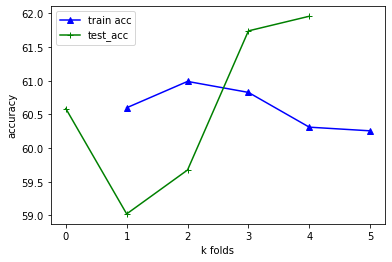

train_acc [60.597826086956516, 60.98886172235806, 60.825862537353984, 60.30969845150774, 60.255365389839724]
test_acc [60.586319218241044, 59.02173913043478, 59.673913043478265, 61.73913043478261, 61.95652173913043]
avg_acc_train 60.59552283760321
avg_acc_test 60.595524713213436


In [41]:
#main

df=load()
df=scale(df)
df_train_l,df_test_l=splits(df)
train_acc_l=[]
train_conf_l=[]
test_acc_l=[]
test_conf_l=[]
for i in range (len(df_train_l)):
    df_train=df_train_l[i]
    df_test=df_test_l[i]
    X_train,Y_train=getXandY(df_train,df)
    X_test,Y_test=getXandY(df_test,df)
    m=model(X_train,Y_train)
    train_acc,train_conf=predict_and_evaluation(X_train,Y_train,m)
    test_acc,test_conf=predict_and_evaluation(X_test,Y_test,m)
    train_acc_l.append(train_acc)
    train_conf_l.append(train_conf)
    test_acc_l.append(test_acc)
    test_conf_l.append(test_conf)
avg_acc_train=sum(train_acc_l)/5
avg_acc_test=sum(test_acc_l)/5

plot_accuracy(train_acc_l,test_acc_l)
print("train_acc",train_acc_l)
print("test_acc",test_acc_l)
print("avg_acc_train",avg_acc_train)
print("avg_acc_test",avg_acc_test)

In [ ]:
'''
Usage: svm-train [options] training_set_file [model_file]
options:
-s svm_type : set type of SVM (default 0)
	0 -- C-SVC		(multi-class classification)
	1 -- nu-SVC		(multi-class classification)
	2 -- one-class SVM
	3 -- epsilon-SVR	(regression)
	4 -- nu-SVR		(regression)
-t kernel_type : set type of kernel function (default 2)
	0 -- linear: u'*v
	1 -- polynomial: (gamma*u'*v + coef0)^degree
	2 -- radial basis function: exp(-gamma*|u-v|^2)
	3 -- sigmoid: tanh(gamma*u'*v + coef0)
	4 -- precomputed kernel (kernel values in training_set_file)
-d degree : set degree in kernel function (default 3)
-g gamma : set gamma in kernel function (default 1/num_features)
-r coef0 : set coef0 in kernel function (default 0)
-c cost : set the parameter C of C-SVC, epsilon-SVR, and nu-SVR (default 1)
-n nu : set the parameter nu of nu-SVC, one-class SVM, and nu-SVR (default 0.5)
-p epsilon : set the epsilon in loss function of epsilon-SVR (default 0.1)
-m cachesize : set cache memory size in MB (default 100)
-e epsilon : set tolerance of termination criterion (default 0.001)
-h shrinking : whether to use the shrinking heuristics, 0 or 1 (default 1)
-b probability_estimates : whether to train a SVC or SVR model for probability estimates,
0 or 1 (default 0)
-wi weight : set the parameter C of class i to weight*C, for C-SVC (default 1)
-v n: n-fold cross validation mode
-q : quiet mode (no outputs)


option -v randomly splits the data into n parts and calculates cross
'''